# Hypothesis Testing Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

<font color = 'red'>**Has the network latency gone up since we switched internet service providers?**<font color = 'black'>

**null hypothesis:**
There is no significant difference in network latency since we switched internet service providers.
    

 **alternative hypothesis:**
There is a difference in network latency since we switched internet service providers.   -- "The new ISP has higher latency"
    
    
 **True Positive:**
We switch providers and network latency has increased.  (we reject null)
    
    
**True Negative:**
We switched providers and there wasn't much difference in latency (we fail to reject the null)

**Type I Error: (False Positive)**-- no wolf!
The latency has increased, but maybe because we're checking at peak hours (reject null)
    

**Type II: (False Negative)**
Not much difference, but maybe because we took the reading during a time when traffic is unusually slow. (fail to reject null)



<font color = 'red'>**Is the website redesign any good?**<font color = 'black'>
    
I'd like more information - what are you measuring here -- what makes it better?  More time, more clicks, less need for help?
    
**Null:** 
There is no difference in traffic between the old and new websites.

    
**Alternative:** 
Website traffic (more) has changed since the website was redesigned.  

    
**True Positive:**
The network traffic has increased since the website redesign  -- we think it helped -- and it really did (reject null)
   
    
**True Negative:**
The network traffic has not increased since the website redesign -- (fail to reject null)
    

**Type I Error  (False Positive):**
We think it helped, but it didn't  (reject null)
    

**Type II   (False Negative):** 
We think it didn't help, but it really did.  (maybe we got negative feedback from some users) (fail to reject null)




<font color = 'red'>**Is our television ad driving more sales?**

**Null:**
There is no difference in sales of our product since we began advertising on television. 
    
    
**Alternative:** 
Our product sales changed (increased) since we began advertising on television. 

    
**True Positive:**
We think that the ad helped and it really did (reject null)
   
    
**True Negative:**
we think the ad didn't help -- and it really didn't -- (fail to reject null)
    

**Type I Error  (False Positive):**
We think it helped, but it didn't  (reject null)
    

**Type II   (False Negative):** 
We think it didn't help, but it really did. (fail to reject null)


    
    

# <font color = 'red'>T-Test Exercises<font color = 'black'>

In [2]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

**<font color = 'red'>Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. <font color = 'black'>**
* A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
* A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
* Use a .05 level of significance.



In [3]:
#we are comparing -- average time (numberic continuous values) to sell for two different groups (categories)

# two sample, two tailed

null_hypothesis = "There is no difference in the average time it takes to sell homes for the two offices."
alt_hypothesis = "The average time to sell a home for the two offices is different."

mean1 = 90
std1 = 15
nobs1 = 40

mean2 = 100
std2 = 20
nobs2 = 50


confidence_level = 0.95
a = 0.5

t, p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)
t, p


(-2.6252287036468456, 0.01020985244923939)

In [4]:
if (p/2) < a:
    print("We reject the null hypothesis that the average home sale time is the same for both offices.")
else: 
    print("We fail to reject the null hypothesis. This means that we don't have sufficient evident to support the claim.")

We reject the null hypothesis that the average home sale time is the same for both offices.


Load the mpg dataset and use it to answer the following questions:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

* Are compact cars more fuel-efficient than the average car?

* Do manual cars get better gas mileage than automatic cars?

In [5]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


* <font color = 'red'>Is there a difference in fuel-efficiency in cars from 2008 vs 1999?<font color = 'black'>

In [6]:
null_hypothesis = "There is no difference in the fuel-efficiency of cars from 2008 and cars from 1999."
alternative_hypothesis = "There is a difference in the fuel-efficiency of cars from 2008 and cars from 1999."
confidence_level = .95
a = 1 - confidence_level


mpg["average_mpg"] = (mpg['cty'] + mpg['hwy'])/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<AxesSubplot:>

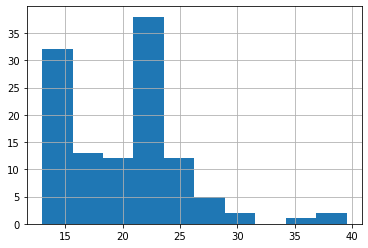

In [7]:
Twenty_o_eight = mpg[mpg.year == 2008]
Ninety_nine = mpg[mpg.year == 1999]

Ninety_nine.average_mpg.hist()

<AxesSubplot:>

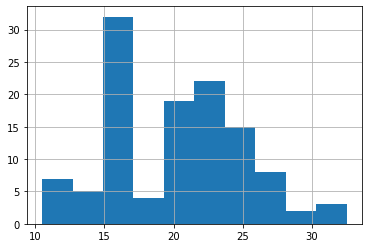

In [8]:
Twenty_o_eight.average_mpg.hist()

In [9]:
t, p = stats.ttest_ind(Ninety_nine.average_mpg, Twenty_o_eight.average_mpg)
t,p

(0.21960177245940962, 0.8263744040323578)

In [10]:
if p < a:
    print("We reject the null hypothesis that they are the same")
    print("We move forward with the alternative hypothesis.")
else: 
    print("We fail to reject the null hypothesis that there is no difference in fuel-efficiency in cars from 2008 and cars from 1999.")

We fail to reject the null hypothesis that there is no difference in fuel-efficiency in cars from 2008 and cars from 1999.


* <font color = 'red'>Are compact cars more fuel-efficient than the average car?<font color = 'black'>

In [11]:
compact = mpg[mpg['class'] == 'compact']
compact.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<AxesSubplot:>

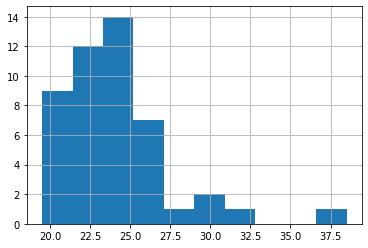

In [12]:
compact.average_mpg.hist()

<AxesSubplot:>

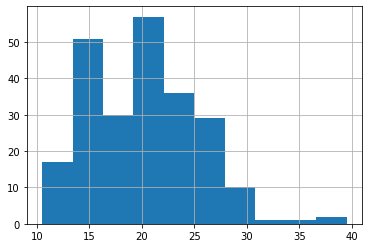

In [13]:
mpg.average_mpg.hist()

In [14]:
null_hypothesis = "There is no difference in the fuel efficiency of subcompacts and the average car."
alternative_hypothesis = "Subcompacts have better fuel efficience than the average car"

#consider using harmonic mean instead because we are average unit rates

mpg['average_mpg'] = stats.hmean(mpg[['cty','hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [15]:
mpg_08 = mpg[mpg.year == 2008].average_mpg
mpg_99 = mpg[mpg.year == 1999].average_mpg

In [16]:
t, p = stats.ttest_ind(mpg_08, mpg_99)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [17]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [18]:
mpg_08.mean(), mpg_99.mean()

(19.488662986569054, 19.68238764869729)

**2.  Are compact cars more fuel-efficient than the average car?**
 (1-sample, 1-tailed t-test)

In [19]:
# Null Hypothesis:  There is no difference in fuel-efficiency between compact cars and the average car in the population.
# Alternative:  Compact cars are more fuel efficient than the average car

#for Alt to be true, t>0 and p/2 < 0.05


mpg_compact = mpg[mpg['class'] == 'compact'].average_mpg
μ = mpg.average_mpg.mean()

t, p = stats.ttest_1samp(mpg_compact, μ)
t,p


(7.512360093161354, 1.5617666348807727e-09)

In [20]:
print("Because p/2 < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency in compact cars and the average car population.")

Because p/2 < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency in compact cars and the average car population.


**Do manual cars get better gas mileage than automatic cars?**

* Null = "There is no difference in fuel-efficiency between manual and automatic cars."
* Ha = "There is a difference in fuel-efficiency between manual and automatic cars."
    
    

In [21]:
mpg_auto = mpg[mpg.trans.str.contains('auto')].average_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].average_mpg

t, p = stats.ttest_ind(mpg_manual,mpg_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [22]:
print("Because p/2 < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars.")

Because p/2 < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars.


Text(0.5, 1.0, 'Is mileage different by transmission type?')

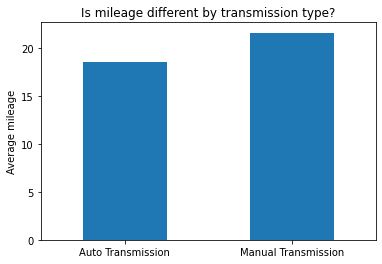

In [23]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

mpg.groupby('transmission_type').average_mpg.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# <font color = 'red'>Correlation Exercises <font color = 'black'>

**1. Use the ```telco_churn``` data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from pydataset import data


#read our data file

telco = pd.read_csv('Cust_Churn_Telco.csv')
telco.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [25]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
# in the event of nans:  
# df = df.dropna()

telco.dropna()
telco

# in the event of empty strings -- not applicable in my dataset

#telco['TotalCharges'] = (telco['TotalCharges'] + '0').astype(float)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [27]:
# n = telco.shape[0]
# degf = n - 2
# conf_interval = .95
# α = 1 - conf_interval

x = telco.tenure
y = telco.MonthlyCharges

In [28]:
# def stdev(x):
#     variance = ((x - x.mean()) ** 2).sum()/n
#     return sqrt(variance)

# r_xy = (((x - x.mean()) * (y - y.mean())).sum()/n)/(stdev(x) * stdev(y))
# r_xy

In [29]:
# t = (r_xy * sqrt(n-2)) / sqrt(1-r_xy**2)
# t

In [30]:
# p  = stats.t.sf(t, df=degf) * 2
# p

In [31]:
# p < α

In [32]:
#ys = 

<font color='red'>**Does tenure correlate with monthly charges?** <font color = 'black'>

In [33]:
corr, p = stats.pearsonr(x,y)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

<font color='red'>**Does tenure correlate with total charges?** <font color = 'black'>

In [34]:
telco = telco.dropna()

# in the event of empty strings 

#telco['TotalCharges'] = (telco['TotalCharges'] + '0').astype(float)

x = telco.tenure
y = telco.TotalCharges

r, p = stats.pearsonr(x,y)
r, p

print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:e}')
if p < 0.05:
    print('P is below alpha and we can reject our null hypothesis!')

Pearson Correlation is calculated at 0.826 with a p value of 0.000000e+00
P is below alpha and we can reject our null hypothesis!


# What happens if you control for phone and internet service?

In [35]:
#services_telco = non_na_telco[(non_na_telco.PhoneService == 'Yes')&(non_na_telco.InternetService != 'No')]

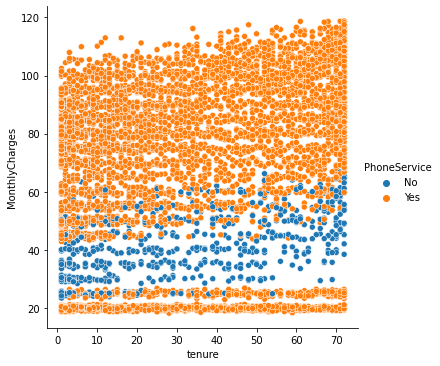

In [36]:
sns.relplot(x='tenure', y='MonthlyCharges', hue='PhoneService',data=telco)

In [37]:
x_phone_tenure = telco['tenure'][telco['PhoneService'] =='Yes']
x_phone_totalcharges = telco['TotalCharges'][telco['PhoneService'] == 'Yes']
y_phone_monthlycharges = telco['TotalCharges'][telco['PhoneService'] == 'Yes']

In [38]:
x_no_phone_tenure = telco['tenure'][telco['PhoneService'] =='No']
x_no_phone_totalcharges = telco['TotalCharges'][telco['PhoneService'] == 'No']
y_no_phone_monthlycharges = telco['TotalCharges'][telco['PhoneService'] == 'No']

In [39]:
r, p = stats.pearsonr(x_phone_tenure, y_phone_monthlycharges)
print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.8298393210699408 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


In [40]:
r, p = stats.pearsonr(x_no_phone_tenure, y_no_phone_monthlycharges)
print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.9534228506954516 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


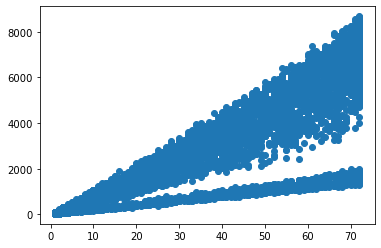

In [41]:
plt.scatter(x_phone_tenure,y_phone_monthlycharges)

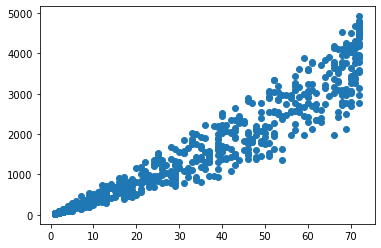

In [42]:
plt.scatter(x_no_phone_tenure,y_no_phone_monthlycharges)

**USING DICTIONARIES INSTEAD ** (copied directly from walkthrough)

In [43]:
# make the columns more explicit for our dictionary keys and labels

In [44]:
telco['InternetService'] = 'Internet Service: ' + telco['InternetService']
telco['PhoneService'] = 'Phone Service: ' + telco['PhoneService']
telco['Internet_and_Phone'] = telco['InternetService'] + telco['PhoneService']

<ipython-input-44-51aba9b7e539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco['InternetService'] = 'Internet Service: ' + telco['InternetService']
<ipython-input-44-51aba9b7e539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco['PhoneService'] = 'Phone Service: ' + telco['PhoneService']
<ipython-input-44-51aba9b7e539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [45]:
telco['Internet_and_Phone'].value_counts()

Internet Service: Fiber opticPhone Service: Yes    3096
Internet Service: DSLPhone Service: Yes            1736
Internet Service: NoPhone Service: Yes             1520
Internet Service: DSLPhone Service: No              680
Name: Internet_and_Phone, dtype: int64

In [46]:
#Using dictionary structures and loops

In [47]:
x = {}
y = {}
control = ['InternetService', 'PhoneService', 'Internet_and_Phone']
for cntrl in control:
    for val in telco[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['tenure'] = telco['tenure'][telco[cntrl] == val]
        y[val]['TotalCharges'] = telco['TotalCharges'][telco[cntrl] == val]
        y[val]['MonthlyCharges'] = telco['MonthlyCharges'][telco[cntrl] == val]

In [48]:
x['Internet Service: DSL'].keys()

dict_keys(['tenure'])

For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.9411848215629786 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


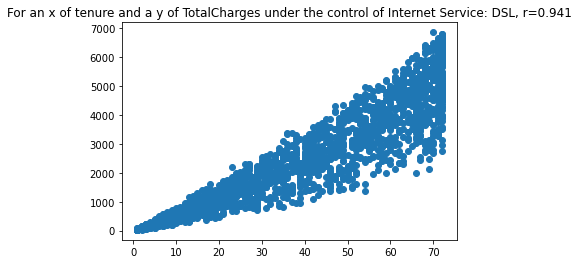

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.5197012004433113 with a p value of 2.889518579135088e-167
 p is less than our alpha and we can reject the null hypothesis


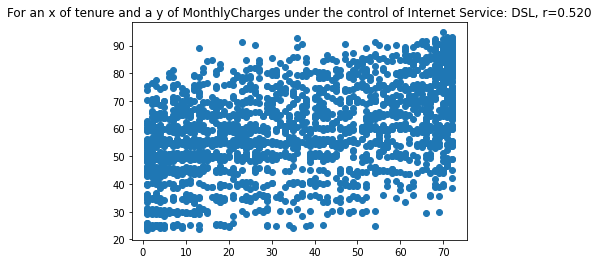

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.9853093528070603 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


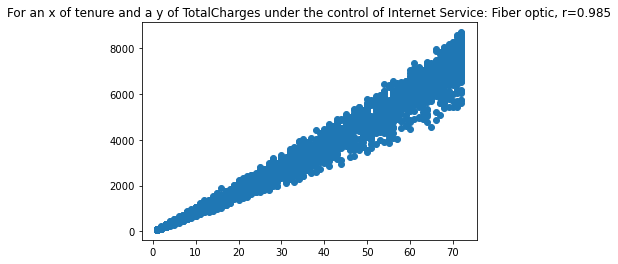

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.6246206176175583 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


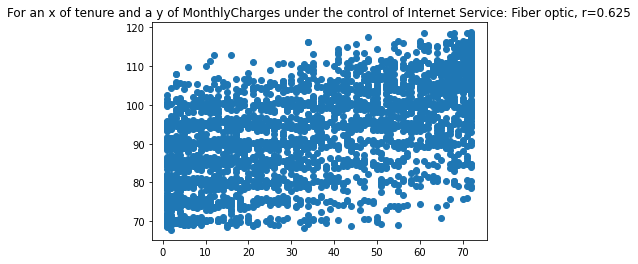

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.9814648859044286 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


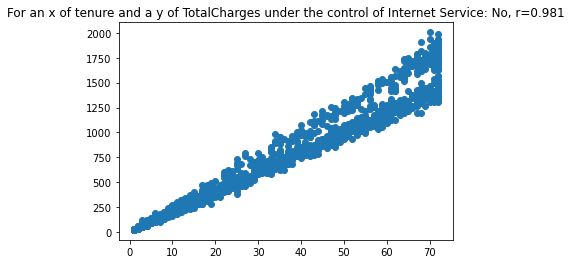

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.34618773548574655 with a p value of 4.896604599951957e-44
 p is less than our alpha and we can reject the null hypothesis


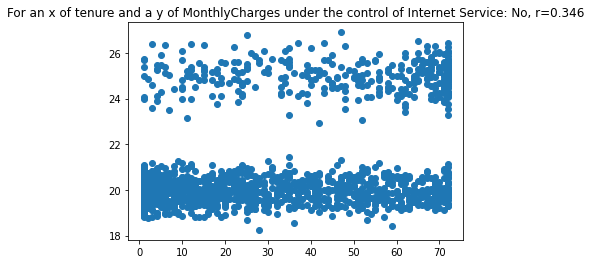

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.9534228506954516 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


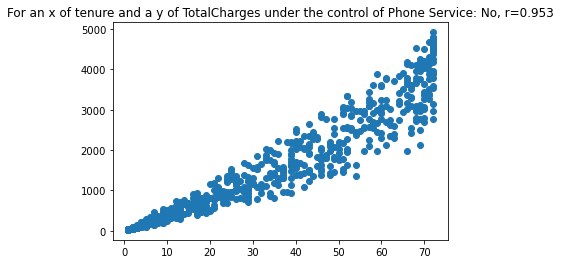

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.5924298640568983 with a p value of 1.1732739032891168e-65
 p is less than our alpha and we can reject the null hypothesis


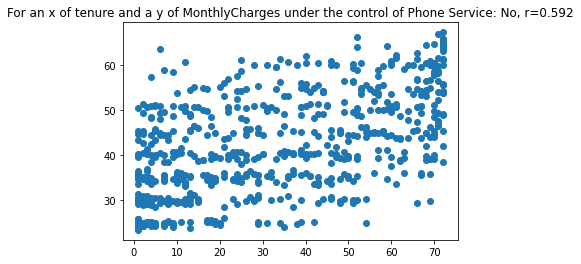

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.8298393210699408 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


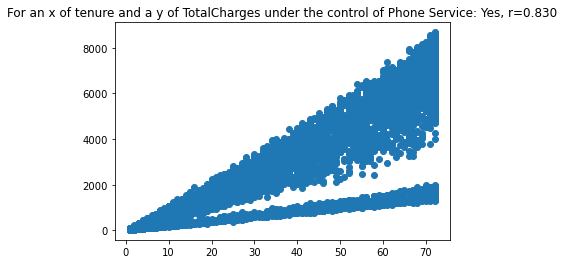

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.2441939657519323 with a p value of 6.82801603762022e-87
 p is less than our alpha and we can reject the null hypothesis


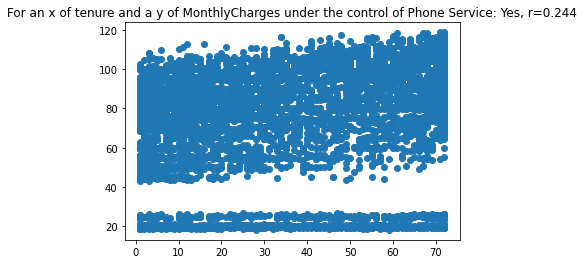

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.9534228506954516 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


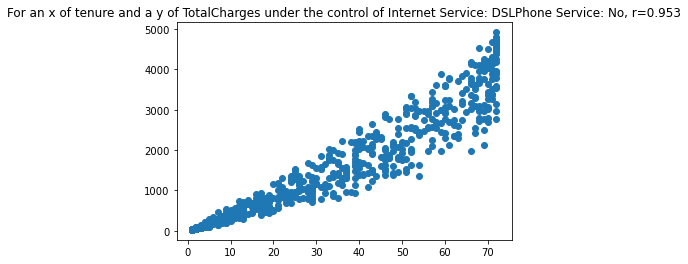

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.5924298640568983 with a p value of 1.1732739032891168e-65
 p is less than our alpha and we can reject the null hypothesis


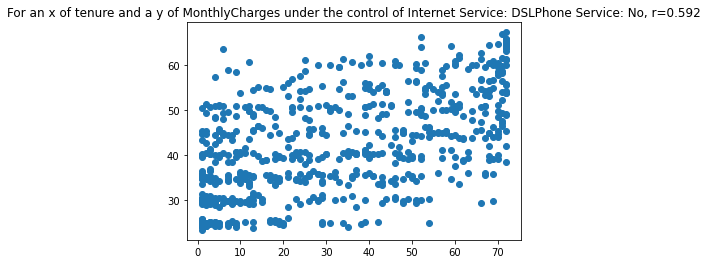

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.9705325404027031 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


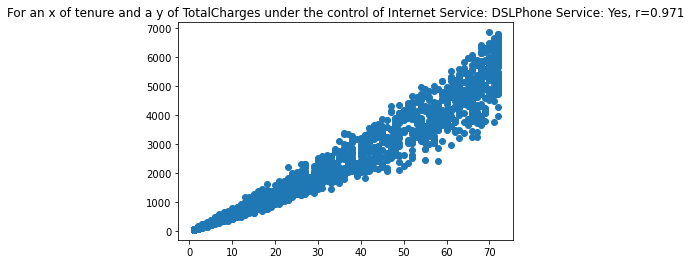

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.6580939590305944 with a p value of 5.781402074466022e-216
 p is less than our alpha and we can reject the null hypothesis


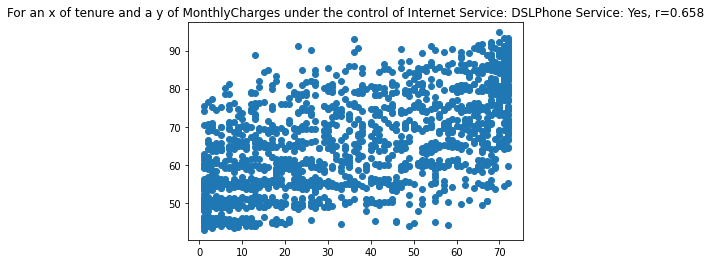

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.9853093528070603 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


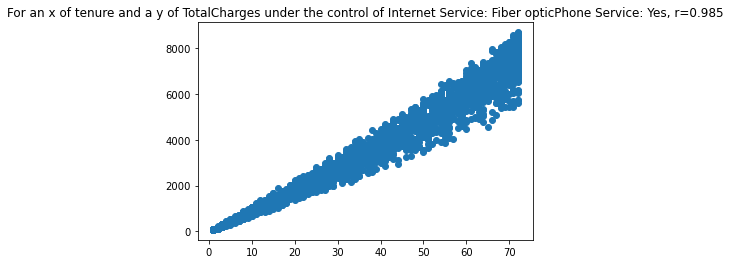

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.6246206176175583 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


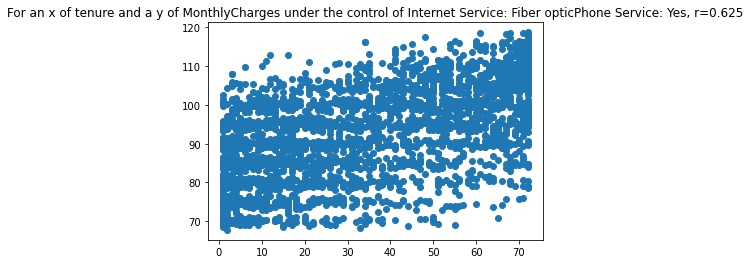

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.9814648859044286 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


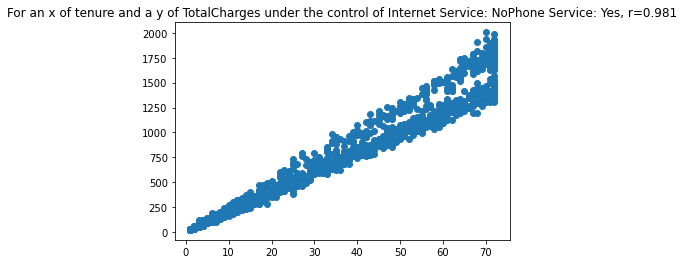

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.34618773548574655 with a p value of 4.896604599951957e-44
 p is less than our alpha and we can reject the null hypothesis


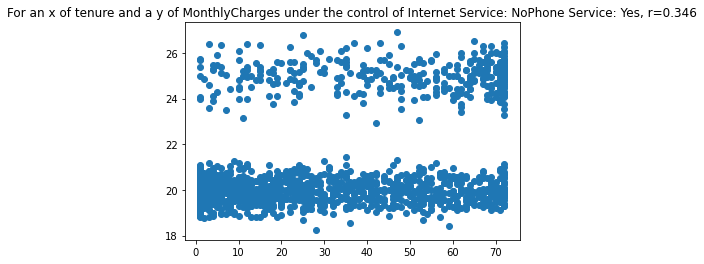

------------------------------------
------------------------------------
------------------------------------


<Figure size 432x288 with 0 Axes>

In [49]:
for key in y:
    print('For customers with {key}: ')
    for subkey in y[key]:
        print(f'For an x of tenure and a y of {subkey}: ')
        r, p = stats.pearsonr(x[key]['tenure'], y[key][subkey])
        print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
        if p < 0.05:
            print(f' p is less than our alpha and we can reject the null hypothesis')
        plt.title(f'For an x of tenure and a y of {subkey} under the control of {key}, r={r:.3f}')
        plt.scatter(x[key]['tenure'], y[key][subkey])
        plt.show()
        plt.clf()
        print('------------------------------------')
        print('------------------------------------')
        print('------------------------------------')

<div class="alert alert-block alert-warning">
Use the employees database:
    
    
Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?
</div>

In [50]:
#environment set up

from env import host, password, user 

def get_db_url(user, password, host, db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'   


In [51]:
#employees = pd.read_sql('SELECT * FROM employees JOIN salaries ON (employees.emp_no=salaries.emp_no)',get_db_url(user, password, host,'employees'))

* **Is there a relationship between how long an employee has been with the company and their salary?**

In [52]:
url = get_db_url(user,password,host,'employees')
query = '''
SELECT salary, DATEDIFF(curdate(), hire_date) as 'days'
FROM salaries
JOIN employees USING(emp_no)
WHERE to_date > now()
'''

employees = pd.read_sql(query, url)

In [53]:
employees.head()

,salary,days
0,88958,12652
1,72527,12869
2,43311,12589
3,74057,12494
4,94692,11478


In [54]:
# Null: There is no relationship between salary and time with company
# Ha: There is a relationship between salary and time with company

In [55]:
α = .05

x = employees.days
y = employees.salary

corr, p = stats.pearsonr(x,y)
corr, p

(0.3064625613186078, 0.0)

In [56]:
print("'r' correlation coefficient is", r)
print("p-value (probability of seeing the data given the null hypothesis is true) is ", p)

if p < α:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

'r' correlation coefficient is 0.34618773548574655
p-value (probability of seeing the data given the null hypothesis is true) is  0.0
We reject the null hypothesis.


* **Is there a relationship between how long an employee has been with the company and the number of titles they have had?**

In [57]:
# Null: There is no relationship between length of time with the company and the number of titles they have held. 
# Ha: There is a relationship between length of time with the company and number of titles held.

SQL_query = """
SELECT emp_no, datediff(curdate(), hire_date) as tenure, count(*) as number_of_titles
FROM employees
JOIN titles using(emp_no)
GROUP BY emp_no"""
    
titles = pd.read_sql(SQL_query, url)
titles.head()

,emp_no,tenure,number_of_titles
0,10001,12652,1
1,10002,12869,1
2,10003,12589,1
3,10004,12494,2
4,10005,11478,2


In [60]:
α = .05

x = titles.tenure
y = titles.number_of_titles

corr, p = stats.pearsonr(x,y)
corr, p

(0.2665989299136619, 0.0)

In [61]:
r, p = stats.pearsonr(titles.tenure, titles.number_of_titles)
if p < α:
    print("We reject the null hypothesis that there is no relationship between time with the company and number of titles held")
else:
    print("We fail to reject the null hypothesis.")

print("R is:", r)
print("p-value is:", p)
print("alpha is:", α)

We reject the null hypothesis that there is no relationship between time with the company and number of titles held
R is: 0.2665989299136619
p-value is: 0.0
alpha is: 0.05


In [62]:
# Sam's way:
#numbahz["time_here"] = (date.today() - numbahz['hire_date']).dt.days

<font color = 'red'>3. Use the sleepstudy data. Is there a relationship between days and reaction time?<font color = 'black'>

In [63]:
sleepstudy = data('sleepstudy')
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [64]:
#look at documentation 

#data('sleepstudy',show_doc=True)

In [65]:
x = sleepstudy.Days
y = sleepstudy.Reaction

corr, p = stats.pearsonr(x,y)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [66]:
#alldata_balance = alldata[(alldata[IBRD] !=0) | (alldata[IMF] !=0)]

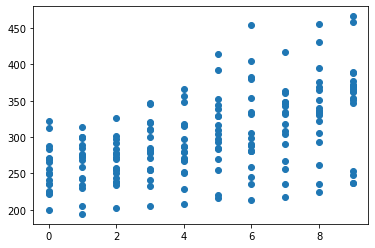

In [67]:
plt.scatter(sleepstudy.Days,sleepstudy.Reaction)

# <font color = 'red'>Chi-Squared Exercises<font color = 'black'>

1.  Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                Codeup Student        Not Codeup Student 
               
Uses a Macbook....................................49....................................20

Doesn't Use A Macbook..........................1....................................30


In [ ]:
# Find the proportions:

# Codeup Student = .5
# Not Codeup Student = .5
# Uses Macbook = .69
# No Macbook = .31

In [68]:
conf_interval = 0.95
alpha = 1 - conf_interval

contingency = pd.DataFrame({'codeup_student':[49,1], 'not_codeup':[20,30]}, index = ['uses_macbook','not_macbook'])
contingency

,codeup_student,not_codeup
uses_macbook,49,20
not_macbook,1,30


In [72]:
# index = ['MacBook', 'No_Macbook']
# columns = ['Codeup', 'Not_Codeup']
# observed = pd.DataFrame ([[49, 20],[1, 31]], index = index, columns = columns)
# n = observed.values.sum()

# chi2 = ((observed - expected)**2 / expected).values.sum()

# nrows, ncols = observed.shape

# degrees_of_freedom = (nrows -1) * (ncols -1)
# p = stats.chi2(degrees_of_freedom).sf(chi2)

# print('Observed')
# print(observed)
# print('---\nExpected')
# print(expected)
# print('---/n')
# print(f'chi^2 = {chi2:.4f}')
# print(f'p.    = {p:.4f}')


chi2,p,degf,expected = stats.chi2_contingency(contingency)

print('Observed\n:')
print(contingency.values)
print('------------------------\nExpected: \n')
print(expected)
print('------------------------\n')
print(f'chi2 = {chi2:.4f}')
print(f'p value: {p:.8f}')
if p < alpha:
      print('We can reject the null hypothesis')

Observed
:
[[49 20]
 [ 1 30]]
------------------------
Expected: 

[[34.5 34.5]
 [15.5 15.5]]
------------------------

chi2 = 36.6526
p value: 0.00000000
We can reject the null hypothesis


In [ ]:
# We have a low p-value, and we can reject the null hypothesis, suggesting that macbook usage may be dependent on codeup participation

**Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.**

In [73]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [74]:
#H0: Class is independent of the drivetrain type. 
#Alternative: they are dependent

#crosstab for drv and class 
observed = pd.crosstab(mpg.drv, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
drv,,,,,,,
4,0,12,3,0,33,4,51
f,0,35,38,11,0,22,0
r,5,0,0,0,0,9,11


In [75]:
# Set our alpha
alpha = .01

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We reject the null hypothesis


In [44]:
p

1.1048811174475079e-40

In [45]:
chi2

221.6011438535253

In [46]:
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
drv,,,,,,,
4,0,12,3,0,33,4,51
f,0,35,38,11,0,22,0
r,5,0,0,0,0,9,11


In [47]:
expected

array([[ 2.2008547 , 20.68803419, 18.04700855,  4.84188034, 14.52564103,
        15.40598291, 27.29059829],
       [ 2.26495726, 21.29059829, 18.57264957,  4.98290598, 14.94871795,
        15.85470085, 28.08547009],
       [ 0.53418803,  5.02136752,  4.38034188,  1.17521368,  3.52564103,
         3.73931624,  6.62393162]])

<font color = 'purple'> **Use the data from the employees database to answer these questions:**

* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
* Is an employee's gender independent of whether or not they are or have been a manager?<font color = 'black'>

In [77]:
#set up sql connection
#environment set up

from env import host, password, user 

def get_db_url(user, password, host, db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'  
    
# What tables do I need? 
# employees
# dept_emp
# departments

# current employees only

# Null: There is no relationship between employees gender and whether they work in sales or marketing.
# Ha: there is a relationship between an employees gender and wehther they work in sales or marketing depts.

url = get_db_url(user,password,host,'employees')
query = '''
SELECT e.gender, d.dept_name
FROM employees AS e
JOIN dept_emp as demp ON demp.emp_no = e.emp_no
AND to_date > curdate()
JOIN departments as d ON demp.dept_no = d.dept_no
'''

gender_by_dept = pd.read_sql(query, url)

In [78]:
gender_by_dept

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [80]:
#filter for only sales and marketing

gender_by_dept = gender_by_dept[(gender_by_dept.dept_name == 'Sales') | (gender_by_dept.dept_name == 'Marketing')]

gender_by_dept.head()

,gender,dept_name
104290,F,Marketing
104291,M,Marketing
104292,F,Marketing
104293,F,Marketing
104294,F,Marketing


In [81]:
# make a crosstab of observed values

observed = pd.crosstab(gender_by_dept.gender, gender_by_dept.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [82]:
#Null(H0) - gender of employee is independent to department (marketing or sales)

chi2, p , degf, expected = stats.chi2_contingency(observed)

print('Observed:\n')
print(observed.values)
print()
print('Expected:\n')
print(expected)
print()
print(f'chi2 = {chi2:.4f}')
print(f'p value: {p:.8f}')
if p < alpha:
    print('We can reject the null hypothesis')

Observed:

[[ 5864 14999]
 [ 8978 22702]]

Expected:

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]

chi2 = 0.3240
p value: 0.56919386


**Is an employee's gender independent of whether or not they are or have been a manager?**

In [83]:
# I will need:
# employee gender
# manager status
#
# table needed: employees, dept_manager

query = """
    SELECT e.emp_no, e.gender, dm.dept_no
    FROM employees as e
    LEFT JOIN dept_manager AS dm ON e.emp_no = dm.emp_no
    """

In [91]:
# create dataframe from query

gender_manager = pd.read_sql(query, url)
gender_manager

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [92]:
#rename columne and fill nan's

gender_manager = gender_manager.rename(columns={'dept_no':'manager'}).fillna(0)

In [93]:
#use apply function to make manager status a binary

gender_manager['manager'] = gender_manager['manager'].apply(lambda x: x if x == 0 else 1)

In [94]:
gender_manager.head()

,emp_no,gender,manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0


In [95]:
gender_manager.manager.value_counts()

0    300000
1        24
Name: manager, dtype: int64

In [96]:
#create a crosstab
observed = pd.crosstab(gender_manager['gender'],gender_manager['manager'])
observed

manager,0,1
gender,,
F,120038,13
M,179962,11


In [97]:
#Null: Employee gender is independent of history in management

chi2, p, degf, expecgted = stats.chi2_contingency(observed)

print('Observed:\n')
print(observed.values)
print()
print('Expected:\n')
print(expected)
print()
print(f'chi2 = {chi2:.4f}')
print()
print(f'p value: {p:.8f}')

if p < alpha:
    print('We can reject the null hypothesis')


Observed:

[[120038     13]
 [179962     11]]

Expected:

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]

chi2 = 1.4567

p value: 0.22745819
